<a href="https://colab.research.google.com/github/changsin/FSDL/blob/main/plate_recognizer/notebooks/kaggle_data_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Kaggle license plate dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/changsin/FSDL

Cloning into 'FSDL'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (414/414), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 414 (delta 227), reused 202 (delta 82), pack-reused 0
Receiving objects: 100% (414/414), 95.36 MiB | 8.14 MiB/s, done.
Resolving deltas: 100% (227/227), done.
Checking out files: 100% (44/44), done.


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("plate_recognizer") is None:
    import sys
    sys.path.append('..')

In [ ]:
# TODO: creates some incompatibility problems so commenting out for now
# !pip install pytorch_lightning==1.1.4

In [5]:
from FSDL.plate_recognizer.data.kaggle_data import KaggleData
from FSDL.plate_recognizer.data.cluster import Cluster

kaggle_data = KaggleData()
kaggle_data.prepare_data()

kaggle_data.X.shape

(433, 224, 224, 3)

In [7]:
kaggle_data.cluster_data()

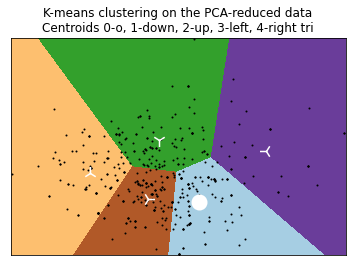

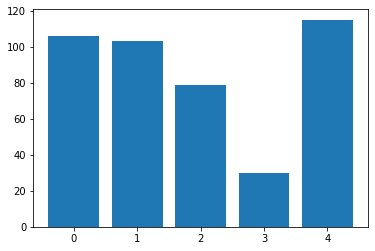

In [9]:
import FSDL.plate_recognizer.utils.plots as plots

K = 5

plots.plot_pca_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca)
plots.plot_cluster_histogram(kaggle_data.X_pca_clusters, K)

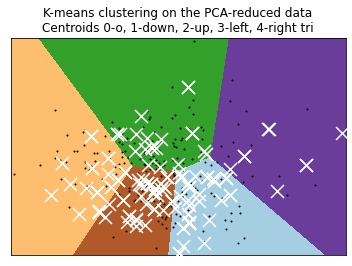

In [12]:
to_remove = Cluster.find_duplicates(kaggle_data.X_pca_reduced)
plots.plot_data_in_clusters(kaggle_data.X_pca, kaggle_data.kmeans_pca, to_remove)

# Remove duplicate data points

In [36]:
kaggle_data_uniq = KaggleData()
kaggle_data_uniq.prepare_data()


##### log path is /content #####


In [37]:
kaggle_data_uniq.cluster_data(K=5, unique=True)

2021-05-31 11:59:02,700 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:82 - Removing duplicates 145
2021-05-31 11:59:02,702 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:86 - Using only 288


##### log path is /content #####
##### log path is /content #####


[autoreload of FSDL.plate_recognizer.data.base_data_module failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded while calling a Python object
]


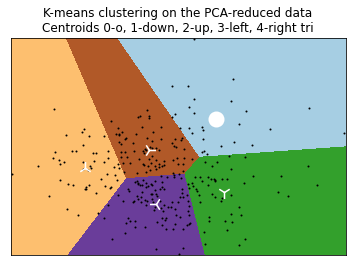

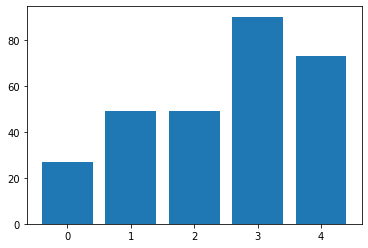

In [38]:
plots.plot_pca_clusters(kaggle_data_uniq.X_pca_reduced, kaggle_data_uniq.kmeans_pca)
plots.plot_cluster_histogram(kaggle_data_uniq.X_pca_clusters, K)

# Weights and Biases

In [42]:
!pip install wandb -qqq
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 5.0MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 133kB 18.9MB/s 
     |████████████████████████████████| 174kB 17.1MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Train

## Full Dataset

In [40]:
from FSDL.plate_recognizer.models.plate_model import PlateModel
from FSDL.plate_recognizer.data.base_data_module import DataType

plate_model = PlateModel()

X_train, Y_train = kaggle_data.get_data(data_type=DataType.Train)
model_cnn = plate_model.create_model(Y_train.shape[0])

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [45]:
from FSDL.plate_recognizer.training.trainer import Trainer

trainer = Trainer(model_cnn)
model_cnn = trainer.train(kaggle_data)

epoch,49
loss,0.00142
accuracy,0.92834
val_loss,0.01423
val_accuracy,0.71053
_runtime,44
_timestamp,1622463265
_step,49
best_val_loss,0.01114
best_epoch,28


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▃▅▅▆▆▆▆▆▇▆▆▇▇▇▇▆▇▇▇▇▆▇▇▇▇▇▇▇█▇▇███▇▇▇██
val_loss,█▅▇▄▂▄▃▃▃▂▂▁▂▂▁▂▃▃▁▂▂▂▄▁▂▂▃▃▃▃▂▂▂▃▁▂▂▂▃▃
val_accuracy,▁▇▃▇▆▃▆▇▇▅█▆▇▇▇▆▆▇▇█▇▆▆▆▇▅▆▅▅▆▆▇▇▇▇▆▆▇▆▆
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


Epoch 1/50
20/20 [==============================] - 1s 42ms/step - loss: 0.0014 - accuracy: 0.9251 - val_loss: 0.0138 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9153 - val_loss: 0.0135 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - accuracy: 0.9414 - val_loss: 0.0131 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0015 - accuracy: 0.9055 - val_loss: 0.0141 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9251 - val_loss: 0.0119 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.9121 - val_loss: 0.0142 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9414 - val_loss: 0.0128 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0015 - accuracy: 0.9251 - val_loss: 0.0126 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9186 - val_loss: 0.0128 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9153 - val_loss: 0.0128 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9186 - val_loss: 0.0132 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9283 - val_loss: 0.0131 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9218 - val_loss: 0.0161 - val_accuracy: 0.7895


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.9283 - val_loss: 0.0124 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9218 - val_loss: 0.0120 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9283 - val_loss: 0.0123 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9186 - val_loss: 0.0137 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9088 - val_loss: 0.0147 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9251 - val_loss: 0.0129 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9544 - val_loss: 0.0137 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9153 - val_loss: 0.0136 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9186 - val_loss: 0.0124 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9023 - val_loss: 0.0137 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9153 - val_loss: 0.0129 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9349 - val_loss: 0.0129 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/50
20/20 [==============================] - 1s 39ms/step - loss: 9.9009e-04 - accuracy: 0.9577 - val_loss: 0.0130 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9316 - val_loss: 0.0152 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9316 - val_loss: 0.0125 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9218 - val_loss: 0.0125 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9511 - val_loss: 0.0139 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0010 - accuracy: 0.9349 - val_loss: 0.0121 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9446 - val_loss: 0.0126 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9121 - val_loss: 0.0149 - val_accuracy: 0.7895


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/50
20/20 [==============================] - 1s 39ms/step - loss: 9.3838e-04 - accuracy: 0.9251 - val_loss: 0.0143 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/50
20/20 [==============================] - 1s 39ms/step - loss: 9.8477e-04 - accuracy: 0.9446 - val_loss: 0.0127 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/50
20/20 [==============================] - 1s 39ms/step - loss: 9.7908e-04 - accuracy: 0.9316 - val_loss: 0.0126 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/50
20/20 [==============================] - 1s 39ms/step - loss: 9.2418e-04 - accuracy: 0.9511 - val_loss: 0.0135 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/50
20/20 [==============================] - 1s 40ms/step - loss: 9.2994e-04 - accuracy: 0.9316 - val_loss: 0.0144 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/50
20/20 [==============================] - 1s 40ms/step - loss: 9.1317e-04 - accuracy: 0.9349 - val_loss: 0.0127 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/50
20/20 [==============================] - 1s 40ms/step - loss: 8.7405e-04 - accuracy: 0.9349 - val_loss: 0.0122 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9381 - val_loss: 0.0141 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9381 - val_loss: 0.0133 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9186 - val_loss: 0.0127 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9381 - val_loss: 0.0135 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9446 - val_loss: 0.0126 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9511 - val_loss: 0.0136 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0010 - accuracy: 0.9218 - val_loss: 0.0129 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/50
20/20 [==============================] - 1s 39ms/step - loss: 9.1254e-04 - accuracy: 0.9511 - val_loss: 0.0139 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/50
20/20 [==============================] - 1s 39ms/step - loss: 9.8934e-04 - accuracy: 0.9283 - val_loss: 0.0136 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/50
20/20 [==============================] - 1s 39ms/step - loss: 9.4115e-04 - accuracy: 0.9381 - val_loss: 0.0126 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-05-31 12:21:40,815 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:34 - Score : 79.55%
100/100 [==============================] - 1s 6ms/step - loss: 0.0060 - accuracy: 0.7841
2021-05-31 12:21:41,466 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:38 - Test results 
 Loss: 0.006036889739334583
 Accuracy: 0.7840909361839294


In [50]:
plate_model_uniq = PlateModel()

X_train_uniq, Y_train_uniq = kaggle_data_uniq.get_data(data_type=DataType.Train)
model_cnn_uniq = plate_model.create_model(Y_train_uniq.shape[0])

trainer_uniq = Trainer(model_cnn_uniq)
model_cnn_uniq = trainer.train(kaggle_data_uniq)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-trainable params: 14,714,688
__________________________________

epoch,49
loss,0.00094
accuracy,0.93811
val_loss,0.01262
val_accuracy,0.68421
_runtime,42
_timestamp,1622463700
_step,49
best_val_loss,0.01195
best_epoch,4


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▆▆▇█▅▇█▅▄▅▅▅▅▄▅▅▄▄▄▃▂▂▂▂▂▂▃▁▂▁▁▁▃▃▃▃▃▃▁▁
accuracy,▄▃▆▁▂▆▄▃▃▄▃▄▄▃▂▄▃▃▁▃█▅▅▃▅▆▂▄▅▇▅▅▆▆▃▆▇▃▇▆
val_loss,▄▃▃▅▅▂▂▂▃▃█▂▁▄▆▂▄▁▄▂▃▆▂▂▁▂▆▅▂▃▅▂▄▃▂▃▄▂▄▂
val_accuracy,▇▅▂▅▅▁▄▇▄▄█▂▅▄▄▁▄▂▄▂▄▇▂▄▂▂█▄▂▂▄▄▅▂▂▄▄▅▅▂
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


Epoch 1/50
13/13 [==============================] - 3s 227ms/step - loss: 9.4056e-04 - accuracy: 0.9363 - val_loss: 8.0239e-04 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/50
13/13 [==============================] - 1s 41ms/step - loss: 0.0012 - accuracy: 0.9559 - val_loss: 9.2262e-04 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/50
13/13 [==============================] - 1s 42ms/step - loss: 0.0012 - accuracy: 0.9265 - val_loss: 9.1035e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/50
13/13 [==============================] - 1s 41ms/step - loss: 0.0012 - accuracy: 0.9510 - val_loss: 9.3696e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/50
13/13 [==============================] - 1s 41ms/step - loss: 0.0010 - accuracy: 0.8971 - val_loss: 7.6588e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/50
13/13 [==============================] - 1s 42ms/step - loss: 8.8459e-04 - accuracy: 0.9608 - val_loss: 7.4508e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/50
13/13 [==============================] - 1s 42ms/step - loss: 9.6376e-04 - accuracy: 0.9657 - val_loss: 8.0104e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/50
13/13 [==============================] - 1s 41ms/step - loss: 9.4112e-04 - accuracy: 0.9510 - val_loss: 7.2070e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/50
13/13 [==============================] - 1s 41ms/step - loss: 8.6425e-04 - accuracy: 0.9804 - val_loss: 0.0010 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/50
13/13 [==============================] - 1s 41ms/step - loss: 9.0633e-04 - accuracy: 0.9461 - val_loss: 9.6550e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/50
13/13 [==============================] - 1s 41ms/step - loss: 8.2778e-04 - accuracy: 0.9510 - val_loss: 7.5089e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/50
13/13 [==============================] - 1s 42ms/step - loss: 7.7358e-04 - accuracy: 0.9608 - val_loss: 8.7617e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/50
13/13 [==============================] - 1s 42ms/step - loss: 8.6028e-04 - accuracy: 0.9559 - val_loss: 7.5984e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/50
13/13 [==============================] - 1s 43ms/step - loss: 8.3343e-04 - accuracy: 0.9755 - val_loss: 7.2595e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/50
13/13 [==============================] - 1s 42ms/step - loss: 8.6177e-04 - accuracy: 0.9657 - val_loss: 6.5061e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/50
13/13 [==============================] - 1s 42ms/step - loss: 8.6746e-04 - accuracy: 0.9657 - val_loss: 6.7619e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/50
13/13 [==============================] - 1s 42ms/step - loss: 8.4121e-04 - accuracy: 0.9559 - val_loss: 7.5052e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/50
13/13 [==============================] - 1s 42ms/step - loss: 7.9023e-04 - accuracy: 0.9510 - val_loss: 5.9806e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/50
13/13 [==============================] - 1s 41ms/step - loss: 9.0014e-04 - accuracy: 0.9510 - val_loss: 8.2299e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/50
13/13 [==============================] - 1s 42ms/step - loss: 8.4833e-04 - accuracy: 0.9412 - val_loss: 7.8114e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/50
13/13 [==============================] - 1s 41ms/step - loss: 7.9714e-04 - accuracy: 0.9559 - val_loss: 8.0812e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/50
13/13 [==============================] - 1s 41ms/step - loss: 8.6604e-04 - accuracy: 0.9461 - val_loss: 6.6749e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/50
13/13 [==============================] - 1s 42ms/step - loss: 8.5466e-04 - accuracy: 0.9608 - val_loss: 7.2226e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/50
13/13 [==============================] - 1s 41ms/step - loss: 8.6192e-04 - accuracy: 0.9657 - val_loss: 0.0011 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/50
13/13 [==============================] - 1s 41ms/step - loss: 8.8879e-04 - accuracy: 0.9314 - val_loss: 0.0011 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/50
13/13 [==============================] - 1s 41ms/step - loss: 8.3440e-04 - accuracy: 0.9608 - val_loss: 7.5142e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/50
13/13 [==============================] - 1s 42ms/step - loss: 8.5661e-04 - accuracy: 0.9559 - val_loss: 7.8560e-04 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/50
13/13 [==============================] - 1s 42ms/step - loss: 8.5450e-04 - accuracy: 0.9608 - val_loss: 6.7217e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/50
13/13 [==============================] - 1s 42ms/step - loss: 8.2770e-04 - accuracy: 0.9608 - val_loss: 7.6965e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/50
13/13 [==============================] - 1s 42ms/step - loss: 8.2691e-04 - accuracy: 0.9657 - val_loss: 0.0011 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/50
13/13 [==============================] - 1s 41ms/step - loss: 7.7578e-04 - accuracy: 0.9412 - val_loss: 5.2286e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/50
13/13 [==============================] - 1s 41ms/step - loss: 7.7237e-04 - accuracy: 0.9804 - val_loss: 6.2151e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/50
13/13 [==============================] - 1s 42ms/step - loss: 7.2151e-04 - accuracy: 0.9363 - val_loss: 7.6931e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/50
13/13 [==============================] - 1s 41ms/step - loss: 7.6534e-04 - accuracy: 0.9461 - val_loss: 7.2636e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/50
13/13 [==============================] - 1s 42ms/step - loss: 7.7206e-04 - accuracy: 0.9216 - val_loss: 6.3614e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/50
13/13 [==============================] - 1s 42ms/step - loss: 8.3709e-04 - accuracy: 0.9608 - val_loss: 6.5339e-04 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/50
13/13 [==============================] - 1s 42ms/step - loss: 8.5120e-04 - accuracy: 0.9853 - val_loss: 7.9899e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/50
13/13 [==============================] - 1s 42ms/step - loss: 7.8038e-04 - accuracy: 0.9559 - val_loss: 7.0538e-04 - val_accuracy: 0.8800


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/50
13/13 [==============================] - 1s 41ms/step - loss: 7.3056e-04 - accuracy: 0.9755 - val_loss: 6.0198e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/50
13/13 [==============================] - 1s 42ms/step - loss: 7.2357e-04 - accuracy: 0.9755 - val_loss: 6.1729e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/50
13/13 [==============================] - 1s 42ms/step - loss: 7.5894e-04 - accuracy: 0.9657 - val_loss: 5.2061e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/50
13/13 [==============================] - 1s 41ms/step - loss: 7.8678e-04 - accuracy: 0.9559 - val_loss: 9.5448e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/50
13/13 [==============================] - 1s 41ms/step - loss: 8.2334e-04 - accuracy: 0.9608 - val_loss: 8.8345e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/50
13/13 [==============================] - 1s 41ms/step - loss: 7.5415e-04 - accuracy: 0.9755 - val_loss: 7.9760e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/50
13/13 [==============================] - 1s 42ms/step - loss: 8.8950e-04 - accuracy: 0.9461 - val_loss: 5.7989e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/50
13/13 [==============================] - 1s 42ms/step - loss: 8.8458e-04 - accuracy: 0.9216 - val_loss: 6.3490e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/50
13/13 [==============================] - 1s 42ms/step - loss: 8.4197e-04 - accuracy: 0.9216 - val_loss: 7.8798e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/50
13/13 [==============================] - 1s 41ms/step - loss: 7.0730e-04 - accuracy: 0.9412 - val_loss: 9.1991e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/50
13/13 [==============================] - 1s 42ms/step - loss: 7.7368e-04 - accuracy: 0.9755 - val_loss: 6.7696e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/50
13/13 [==============================] - 1s 41ms/step - loss: 7.6979e-04 - accuracy: 0.9706 - val_loss: 5.2523e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-05-31 12:27:33,758 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:34 - Score : 93.22%
100/100 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9153
2021-05-31 12:27:34,439 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:38 - Test results 
 Loss: 0.0017828227719292045
 Accuracy: 0.9152542352676392


In [58]:
kaggle_data.X_train_d[4].shape

(82, 224, 224, 3)

In [54]:
kaggle_data_uniq.X_train_d[4].shape

(52, 224, 224, 3)

In [ ]:
trainer = Trainer(model_cnn)
model_cnn = trainer.train(kaggle_data)

In [41]:
X_train_d, y_train_d = cluster.to_clusters_dict(dataset.X, dataset.Y, X_train_pca_clusters, K)

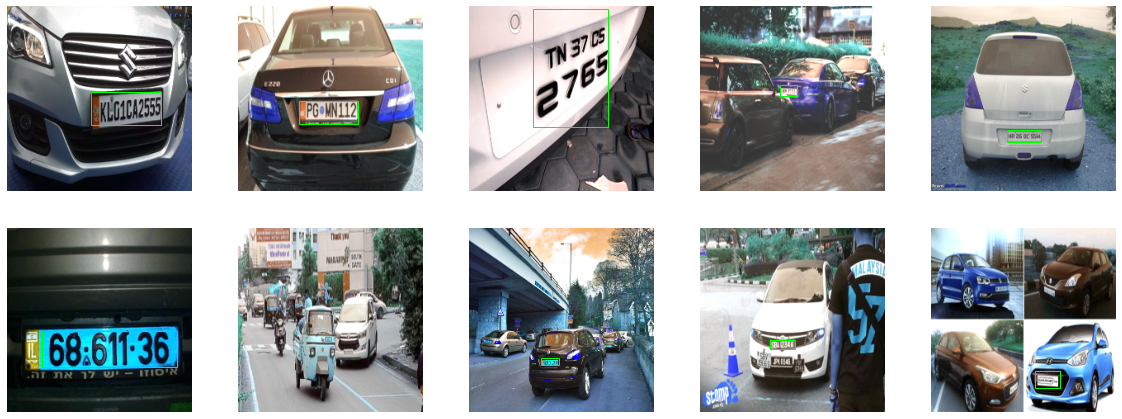

In [54]:
import FSDL.plate_recognizer.plot as plot

plot.plot_images(dataset.X, dataset.Y)